In [ ]:
""" this file makes heatmap of scimilarity vs yang's annotation"""

In [1]:
""" environment """
import scanpy as sc
import warnings
import utils_AT
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#data_path = '../data/KPTracer-Data/expression/adata_processed_comp_SCANTN.h5ad' #(AT)
data_path = '../data/KPTracer-Data/expression/adata_processed_combined_SCANTN.h5ad' #(AT)
adams_comp = sc.read(data_path)

In [10]:
column1_data = adams_comp.obs['Cluster-Name']
column2_data = adams_comp.obs['celltype_hint']

/Applications/PyCharm.app/Contents/plugins/python/helpers/pydev/_pydevd_bundle/pydevd_resolver.py:178: DeprecationWarning: Use is_view instead of isview, isview will be removed in the future.
  attr = getattr(var, n)
/Applications/PyCharm.app/Contents/plugins/python/helpers/pydev/_pydevd_bundle/pydevd_resolver.py:178: DeprecationWarning: Use is_view instead of isview, isview will be removed in the future.
  attr = getattr(var, n)


KeyboardInterrupt: 

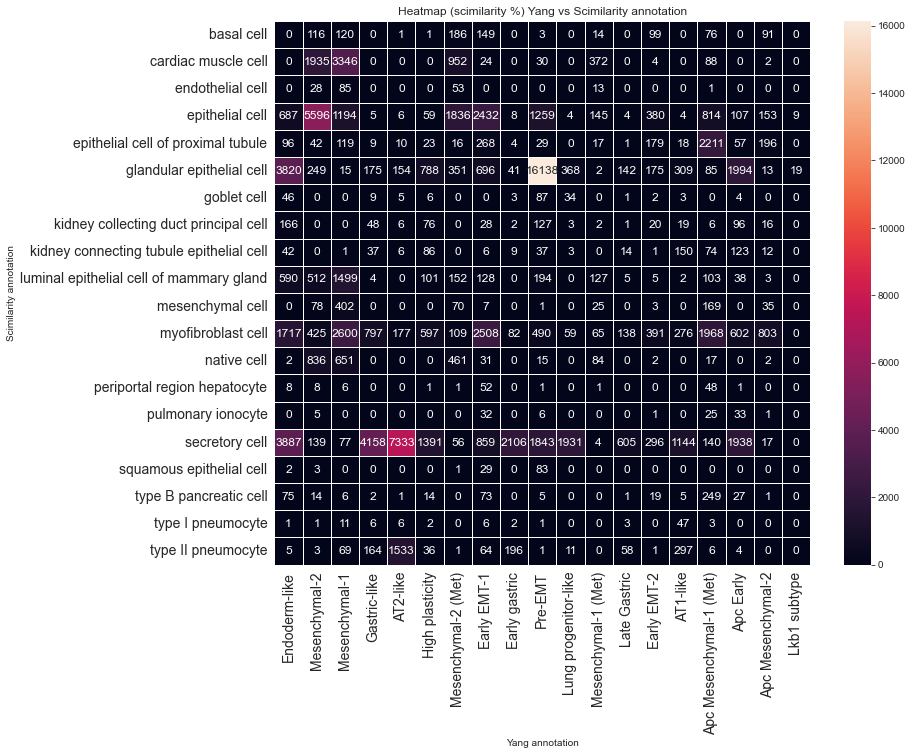

In [7]:
""" row wise (%) """

# Create a frequency matrix
frequency_matrix = pd.crosstab(column2_data, column1_data)

# Create a custom annotation matrix where all values are displayed as strings
annotation_matrix = frequency_matrix.astype(str)
# annotation_matrix = ((frequency_matrix.div(frequency_matrix.sum(axis=1), axis=0) * 100).round(1)).astype(str)
# percentage_matrix = (frequency_matrix.div(frequency_matrix.sum(axis=1), axis=0) * 100).round(2)


# Create a heatmap using seaborn
# sns.heatmap(frequency_matrix, cmap='coolwarm', annot=True, fmt="d", linewidths=0.5, cbar=False)
# sns.heatmap(frequency_matrix, cmap='coolwarm', annot=annotation_matrix, fmt="", linewidths=0.5, cbar=False)
plt.figure(figsize=(12, 10))
# sns.heatmap(percentage_matrix,  annot=annotation_matrix, fmt="s", linewidths=0.5,  annot_kws={"size": 12})
sns.heatmap(frequency_matrix,  annot=annotation_matrix, fmt="s", linewidths=0.5,  annot_kws={"size": 12})

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Yang annotation')
plt.ylabel('Scimilarity annotation')

plt.title('Heatmap (scimilarity %) Yang vs Scimilarity annotation')
plt.savefig('heatmap.jpg', bbox_inches='tight', dpi=150)
plt.show()

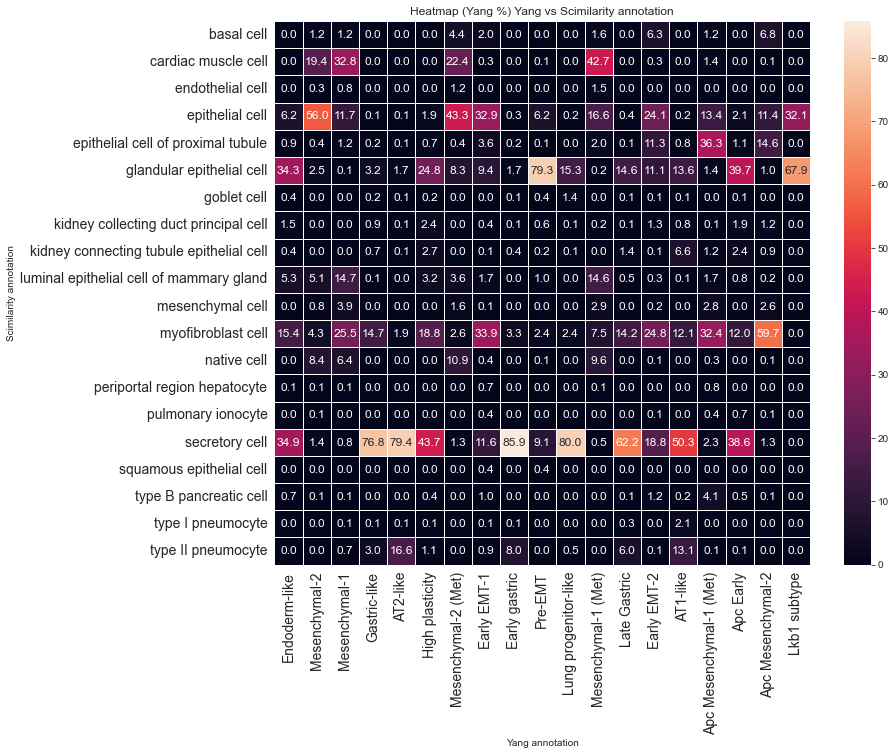

In [8]:
""" column wise (%) """
# Create a frequency matrix
frequency_matrix = pd.crosstab(column2_data, column1_data)

# Create a custom annotation matrix where all values are displayed as strings
#annotation_matrix = frequency_matrix.astype(str)
annotation_matrix = ((frequency_matrix.div(frequency_matrix.sum(axis=0), axis=1) * 100).round(1)).astype(str)
percentage_matrix = (frequency_matrix.div(frequency_matrix.sum(axis=0), axis=1) * 100).round(2)


# Create a heatmap using seaborn
# sns.heatmap(frequency_matrix, cmap='coolwarm', annot=True, fmt="d", linewidths=0.5, cbar=False)
# sns.heatmap(frequency_matrix, cmap='coolwarm', annot=annotation_matrix, fmt="", linewidths=0.5, cbar=False)
plt.figure(figsize=(12, 10))
sns.heatmap(percentage_matrix,  annot=annotation_matrix, fmt="s", linewidths=0.5,  annot_kws={"size": 12})

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Yang annotation')
plt.ylabel('Scimilarity annotation')

plt.title('Heatmap (Yang %) Yang vs Scimilarity annotation')
plt.savefig('heatmap_2.jpg', bbox_inches='tight', dpi=150)
plt.show()